In [7]:
import numpy as np
import pandas as pd

In [8]:
data_df = pd.read_excel('table1.xlsx', header=4)

FileNotFoundError: [Errno 2] No such file or directory: 'table1.xlsx'

In [ ]:
# Printing current column names to identify the issue with 'State' column
data_df.columns

In [ ]:
# Dropping the specified columns from the DataFrame
cleaned_df = data_df.drop(['Percent', 'Absolute', 'Percent.1', 'Absolute.1'], axis=1)

# Now you can proceed with any further operations on cleaned_df


In [ ]:
# Printing current column names to identify the issue with 'State' column
cleaned_df.columns

In [ ]:
# Set 'State' as the index and transpose the DataFrame
final_transposed_df = cleaned_df.set_index('State').transpose()

# Reset index to turn years into a column and rename it
final_transposed_df.reset_index(inplace=True)
final_transposed_df.rename(columns={'index': 'Year'}, inplace=True)

# Display the transformed DataFrame
final_transposed_df.head()

In [ ]:
# Print the number of NaNs in each column
print(final_transposed_df.isna().sum())

In [ ]:
# Dropping the specified columns from the DataFrame
final_transposed_df = final_transposed_df.drop(columns=['Total of states', 'Sources:  U.S. Energy Information Administration (EIA), State Energy Data System and EIA calculations made for this table.'])

# Print the DataFrame to confirm that the columns have been removed
print(final_transposed_df.head())

In [ ]:
final_transposed_df = final_transposed_df.iloc[:, :-1]

In [ ]:
# Display the last few rows of the DataFrame
final_transposed_df

In [ ]:
t1= final_transposed_df
t1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create a new DataFrame for the normalized data
t1_norm = t1.copy()

# Selecting columns to normalize (i.e., all except 'Year')
columns_to_normalize = t1_norm.columns[1:]  # Excluding 'Year' if it's the first column

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
t1_norm[columns_to_normalize] = scaler.fit_transform(t1_norm[columns_to_normalize])

In [ ]:
t1

In [ ]:
t1_norm

####Linear regression

In [ ]:
pip install codecarbon

In [2]:
from codecarbon import EmissionsTracker

# Initialize the emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

[codecarbon WARNING @ 00:51:22] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 00:51:22] [setup] RAM Tracking...
[codecarbon INFO @ 00:51:22] [setup] GPU Tracking...
[codecarbon INFO @ 00:51:22] No GPU found.
[codecarbon INFO @ 00:51:22] [setup] CPU Tracking...
[codecarbon WARNING @ 00:51:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 00:51:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 00:51:24] >>> Tracker's metadata:
[codecarbon INFO @ 00:51:24]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:51:24]   Python version: 3.10.12
[codecarbon INFO @ 00:51:24]   CodeCarbon version: 2.4.1
[codecarbon INFO @ 00:51:24]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:51:24]   CPU count: 2
[codecarbon INFO @ 00:51:24]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 00:51:24]   GPU count: None
[codecarbon INFO @ 00:51:24]   GPU model

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 't1' is your dataframe and it has been preprocessed correctly.
train_df = t1[t1['Year'] <= 2015]
test_df = t1[t1['Year'] >= 2016]

# Prepare the features for all states (repeat each year for each state)
n_states = train_df.drop(columns=['Year']).shape[1]  # Number of states
X_train = np.repeat(train_df[['Year']].values, n_states, axis=0)  # Repeat 'Year' for each state
X_test = np.repeat(test_df[['Year']].values, n_states, axis=0)

# Concatenate all state columns into a single array for training and testing
y_train = train_df.drop(columns=['Year']).values.flatten()
y_test = test_df.drop(columns=['Year']).values.flatten()

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the model
predictions = model.predict(X_test)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the aggregated metrics

print(f"Aggregated MSE: {mse}")
print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated R2: {r2}")

[codecarbon INFO @ 00:51:39] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:51:39] Energy consumed for all CPUs : 0.000128 kWh. Total CPU Power : 30.5 W
[codecarbon INFO @ 00:51:39] 0.000147 kWh of electricity used since the beginning.


NameError: name 't1' is not defined

In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 't1' is your dataframe and it has been preprocessed correctly.
train_norm_df = t1_norm[t1_norm['Year'] <= 2015]
test_norm_df = t1_norm[t1_norm['Year'] >= 2016]

# Prepare the features for all states (repeat each year for each state)
n_states = train_df.drop(columns=['Year']).shape[1]  # Number of states
X_train_norm = np.repeat(train_norm_df[['Year']].values, n_states, axis=0)  # Repeat 'Year' for each state
X_test_norm = np.repeat(test_norm_df[['Year']].values, n_states, axis=0)

# Concatenate all state columns into a single array for training and testing
y_train_norm = train_norm_df.drop(columns=['Year']).values.flatten()
y_test_norm = test_norm_df.drop(columns=['Year']).values.flatten()

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_norm, y_train_norm)

# Predict using the model
predictions = model.predict(X_test_norm)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test_norm, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_norm, predictions)
r2 = r2_score(y_test_norm, predictions)

# Print the aggregated metrics
print(f"Aggregated MAE: {mae}")
print(f"Aggregated MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated R2: {r2}")

Aggregated MAE: 0.34798931740213374
Aggregated MSE: 0.18655448021261828
Aggregated R2: -1.4469503626778537


####Random forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
# Concatenate all state columns into a single array for training and testing
y_train = train_df.drop(columns=['Year']).values.flatten()
y_test = test_df.drop(columns=['Year']).values.flatten()

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# Predict using the model
predictions = rf_model.predict(X_test)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the aggregated metrics
print(f"Aggregated MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated MAE: {mae}")
print(f"Aggregated R2: {r2}")

Aggregated MSE: 11030.227815778959
Aggregated MAE: 66.76818843926048
Aggregated R2: -0.0029723852732757017


In [74]:
from sklearn.ensemble import RandomForestRegressor
# Concatenate all state columns into a single array for training and testing
y_train = train_df.drop(columns=['Year']).values.flatten()
y_test = test_df.drop(columns=['Year']).values.flatten()

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# Predict using the model
predictions = rf_model.predict(X_test)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the aggregated metrics
print(f"Aggregated MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated MAE: {mae}")
print(f"Aggregated R2: {r2}")

Aggregated MSE: 11030.227815778959
Aggregated MAE: 66.76818843926048
Aggregated R2: -0.0029723852732757017


In [75]:
t1

State,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1970,102.646851,11.348910,24.906189,36.178889,294.372200,43.017559,47.831994,16.072307,13.641821,...,9.353695,77.901472,358.910969,24.392285,5.538241,86.621684,44.763398,76.973781,88.185792,18.594275
1,1971,98.461114,12.636423,26.998731,35.091287,305.833367,43.591690,45.894756,15.929520,11.877081,...,9.300113,76.331326,375.778078,25.511077,5.493952,87.421056,46.125536,78.006540,84.770002,18.786527
2,1972,104.932504,13.420588,30.179241,37.189109,312.722261,47.467615,47.215575,16.013802,11.305789,...,9.678573,86.988554,398.160826,25.779459,5.772615,88.681519,52.299580,89.011773,84.260328,21.663917
3,1973,109.563135,12.490564,34.448720,40.829866,329.285277,51.067649,48.576991,17.243519,11.850216,...,9.446069,98.646675,434.669916,28.243561,5.927384,89.568349,57.415109,97.601594,85.443530,23.687781
4,1974,108.777543,12.779110,36.737072,39.112512,304.471018,50.480507,45.425744,16.657406,9.849325,...,9.163160,90.295826,427.355095,29.613769,5.307140,84.982264,53.146294,100.314380,82.063461,23.898776
5,1975,107.779346,14.524477,38.221132,36.365524,311.485516,51.801656,41.688093,15.543109,7.889702,...,10.889713,89.694070,406.649966,31.001713,5.171217,81.168202,54.893145,97.835074,80.810456,25.335515
6,1976,108.089155,15.969357,43.777153,38.857529,326.902403,55.134964,43.432917,16.157030,7.690280,...,12.479400,101.987939,422.052596,30.763057,5.871174,86.110986,54.933672,104.165409,84.122874,30.859601
7,1977,111.683852,17.950301,50.500706,41.649053,354.482753,58.314615,43.051435,16.139793,7.922854,...,12.298986,102.457500,461.131555,31.969825,5.834698,87.390910,60.124671,102.945133,87.194246,36.282123
8,1978,106.629516,19.482875,49.284884,42.418586,345.243293,58.444211,43.969455,16.183481,7.450239,...,12.906775,104.217412,492.488280,34.105808,5.801661,84.738892,58.925803,96.684611,88.622082,37.123974
9,1979,111.552210,17.473269,56.146724,40.245931,362.068049,58.894585,42.014653,17.077238,6.045275,...,12.690947,101.762393,512.302095,36.683561,5.354668,89.514837,61.810888,100.940577,88.328763,42.005848


####LSTM

In [56]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

# Assuming t1 is your DataFrame and already loaded
train_df = t1[t1['Year'] <= 2015]
test_df = t1[t1['Year'] >= 2016]

# Normalize the features
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # All columns except 'Year'
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Reshape for LSTM [samples, timesteps, features]
X_train = train_features.reshape((train_features.shape[0], 1, len(features)))
X_test = test_features.reshape((test_features.shape[0], 1, len(features)))

# Targets should be prepared to match the [samples, features] without time steps for simplicity
y_train = train_df[features].values
y_test = test_df[features].values

# Build and compile the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(features))),
    Dense(len(features))
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict using the model
predictions = model.predict(X_test).reshape(y_test.shape)  # Reshape predictions to match y_test

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"Aggregated MAE: {mae}")
print(f"Aggregated MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated R2: {r2}")

Epoch 1/50
2/2 [==============================] - 1s 10ms/step - loss: 20640.8633
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 20593.2812
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 20478.7695
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 20269.4492
Epoch 5/50
2/2 [==============================] - 0s 9ms/step - loss: 19940.8359
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 19494.5332
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 18958.8184
Epoch 8/50
2/2 [==============================] - 0s 9ms/step - loss: 18316.0449
Epoch 9/50
2/2 [==============================] - 0s 10ms/step - loss: 17569.3750
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 16743.3242
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss: 15849.9824
Epoch 12/50
2/2 [==============================] - 0s 9ms/step - loss: 14875.1846
Epoch 13/50
2/2 [======

In [57]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

# Assuming t1 is your DataFrame and already loaded
train_df = t1_norm[t1_norm['Year'] <= 2015]
test_df = t1_norm[t1_norm['Year'] >= 2016]

# # Normalize the features
# #scaler = MinMaxScaler()
# features = train_df.columns.difference(['Year'])  # All columns except 'Year'
# train_features = train_df[features]
# test_features = test_df[features]

# # Reshape for LSTM [samples, timesteps, features]
# X_train = train_features.reshape((train_features.shape[0], 1, len(features)))
# X_test = test_features.reshape((test_features.shape[0], 1, len(features)))

# # Targets should be prepared to match the [samples, features] without time steps for simplicity
# y_train = train_df[features].values
# y_test = test_df[features].values

# Build and compile the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(features))),
    Dense(len(features))
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict using the model
predictions = model.predict(X_test).reshape(y_test.shape)  # Reshape predictions to match y_test

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"Aggregated MAE: {mae}")
print(f"Aggregated MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated R2: {r2}")


Epoch 1/100
2/2 [==============================] - 2s 10ms/step - loss: 20636.2637
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 20575.1230
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 20424.9570
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 20164.2363
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 19809.6816
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 19295.1719
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 18699.1719
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 17999.2344
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 17186.2441
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 16322.9590
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 15385.8096
Epoch 12/100
2/2 [==============================] - 0s 9ms/step - loss: 14391.2852
Epoch 13/

In [59]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

# Assuming t1 is your DataFrame and already loaded
train_df = t1_norm[t1_norm['Year'] <= 2016]
test_df = t1_norm[t1_norm['Year'] >= 2017]

# Normalize the features
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # All columns except 'Year'
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Reshape for LSTM [samples, timesteps, features]
X_train = train_features.reshape((train_features.shape[0], 1, len(features)))
X_test = test_features.reshape((test_features.shape[0], 1, len(features)))

# Targets should be prepared to match the [samples, features] without time steps for simplicity
y_train = train_df[features].values
y_test = test_df[features].values

# Build and compile the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(features))),
    Dense(len(features))
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=1)

# Predict using the model
predictions = model.predict(X_test).reshape(y_test.shape)  # Reshape predictions to match y_test

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"After Hyperparamter Tuning:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"R2: {r2}")

Epoch 1/150
3/3 [==============================] - 2s 6ms/step - loss: 0.3036
Epoch 2/150
3/3 [==============================] - 0s 5ms/step - loss: 0.1257
Epoch 3/150
3/3 [==============================] - 0s 5ms/step - loss: 0.0610
Epoch 4/150
3/3 [==============================] - 0s 5ms/step - loss: 0.0447
Epoch 5/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0417
Epoch 6/150
3/3 [==============================] - 0s 5ms/step - loss: 0.0332
Epoch 7/150
3/3 [==============================] - 0s 7ms/step - loss: 0.0265
Epoch 8/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0217
Epoch 9/150
3/3 [==============================] - 0s 9ms/step - loss: 0.0185
Epoch 10/150
3/3 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 11/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 12/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 13/150
3/3 [==============================] - 0s 7ms/st

Epoch 1/150
3/3 [==============================] - 1s 6ms/step - loss: 0.3151
Epoch 2/150
3/3 [==============================] - 0s 6ms/step - loss: 0.1226
Epoch 3/150
3/3 [==============================] - 0s 5ms/step - loss: 0.0596
Epoch 4/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0444
Epoch 5/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0374
Epoch 6/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0335
Epoch 7/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0284
Epoch 8/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0223
Epoch 9/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0184
Epoch 10/150
3/3 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 11/150
3/3 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 12/150
3/3 [==============================] - 0s 5ms/step - loss: 0.0142
Epoch 13/150
3/3 [==============================] - 0s 5ms/st

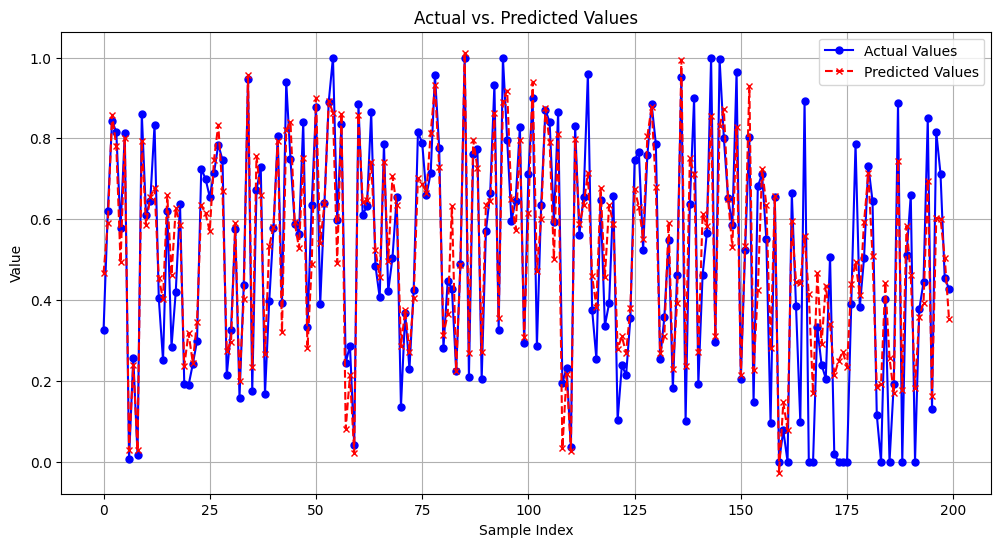

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming t1_norm is preloaded as normalized DataFrame
train_df = t1_norm[t1_norm['Year'] <= 2016]
test_df = t1_norm[t1_norm['Year'] >= 2017]

# Normalize the features
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # All columns except 'Year'
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Reshape for LSTM [samples, timesteps, features]
X_train = train_features.reshape((train_features.shape[0], 1, len(features)))
X_test = test_features.reshape((test_features.shape[0], 1, len(features)))

# Targets should be prepared to match the [samples, features] without time steps for simplicity
y_train = train_df[features].values
y_test = test_df[features].values

# Build and compile the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(features))),
    Dense(len(features))
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=1)

# Predict using the model
predictions = model.predict(X_test).reshape(y_test.shape)  # Reshape predictions to match y_test

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"After Hyperparamter Tuning:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"R2: {r2}")

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.flatten()[:200], label='Actual Values', marker='o', linestyle='-', markersize=5, color='blue')
plt.plot(predictions.flatten()[:200], label='Predicted Values', marker='x', linestyle='--', markersize=5, color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

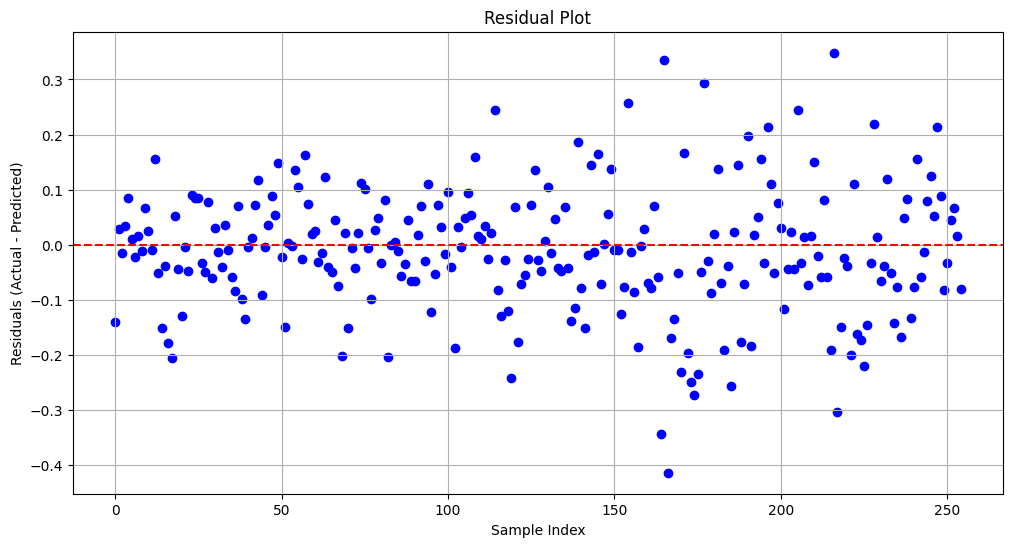

In [70]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test.flatten() - predictions.flatten()

# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Sample Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

plt.show()


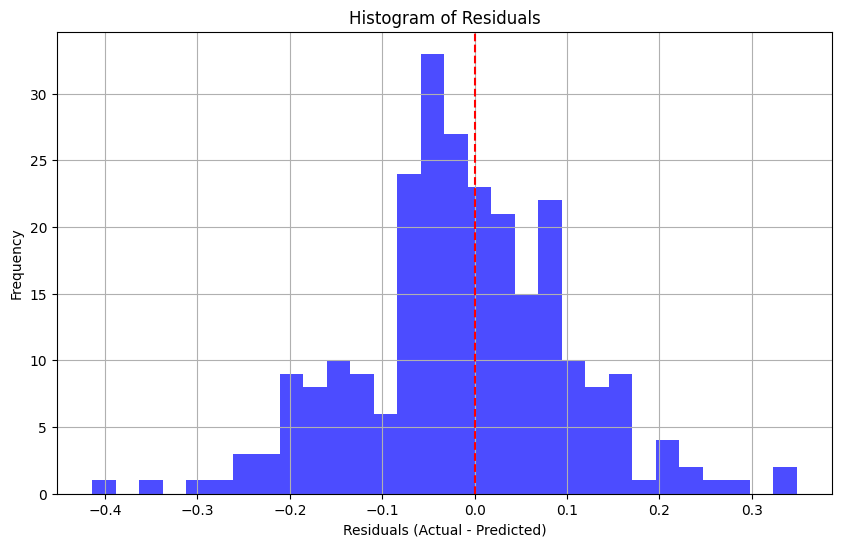

In [71]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test.flatten() - predictions.flatten()

# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

# Data loading and preprocessing steps remain the same
train_df = t1[t1['Year'] <= 2015]
test_df = t1[t1['Year'] >= 2016]

scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Increase sequence length for LSTM
sequence_length = 3  # Example sequence length
X_train = np.array([train_features[i:i + sequence_length] for i in range(len(train_features) - sequence_length)])
X_test = np.array([test_features[i:i + sequence_length] for i in range(len(test_features) - sequence_length)])
y_train = train_features[sequence_length:, :]
y_test = test_features[sequence_length:, :]

# Building a more complex LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(len(features))
])
model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Prediction
predictions = model.predict(X_test).reshape(y_test.shape)

# Metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Printing metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"R2: {r2}")

Epoch 1/50
2/2 [==============================] - 4s 12ms/step - loss: 0.3554
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 0.2722
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.2056
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1178
Epoch 5/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0895
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0649
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0502
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0443
Epoch 9/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0439
Epoch 10/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0388
Epoch 11/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0401
Epoch 12/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0370
Epoch 13/50
2/2 [==============================] - 0s 11ms/st

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def load_data(data):
    # This function should load your data and split into train and test sets
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    train_df = data[data['Year'].dt.year <= 2015]
    test_df = data[data['Year'].dt.year > 2015]
    return train_df, test_df

# Assuming 't1_norm' is a DataFrame loaded and ready
train_df, test_df = load_data(t1_norm)

# Normalize the features
scaler = MinMaxScaler()
features = [col for col in train_df.columns if col != 'Year']  # Ensure 'Year' is not included
X_train = scaler.fit_transform(train_df[features])
X_test = scaler.transform(test_df[features])

# Reshape data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train = train_df[features].values
y_test = test_df[features].values

# Define the model builder function
def create_model(units=50, learning_rate=0.01):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(1, X_train.shape[2])),
        Dense(X_train.shape[2])
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Manual hyperparameter tuning
units_options = [20, 50, 100]
learning_rates = [0.01, 0.001, 0.1]
best_score = float('inf')
best_params = {}

# K-fold cross-validation
kfold = KFold(5, shuffle=True, random_state=42)

for units in units_options:
    for lr in learning_rates:
        cv_scores = []
        for train_idx, val_idx in kfold.split(X_train):
            model = create_model(units=units, learning_rate=lr)
            model.fit(X_train[train_idx], y_train[train_idx], epochs=50, batch_size=32, verbose=0)
            predictions = model.predict(X_train[val_idx])
            mse = mean_squared_error(y_train[val_idx], predictions)
            cv_scores.append(mse)
            print(f"Units: {units}, LR: {lr}, Fold MSE: {mse}")

        average_mse = np.mean(cv_scores)
        print(f"Average MSE for Units: {units}, LR: {lr} = {average_mse}")

        if average_mse < best_score:
            best_score = average_mse
            best_params = {'units': units, 'learning_rate': lr, 'mse': average_mse}

print("Best Score (MSE):", best_score)
print("Best Parameters:", best_params)

# Optionally: retrain your model here with the best parameters on the full training set
# and evaluate it on the test set
final_model = create_model(units=best_params['units'], learning_rate=best_params['learning_rate'])
final_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
print("Test MSE:", final_mse)

1/1 [==============================] - 0s 171ms/step
Units: 20, LR: 0.01, Fold MSE: 0.009682958577967258


1/1 [==============================] - 0s 168ms/step
Units: 20, LR: 0.01, Fold MSE: 0.010191799627402987


1/1 [==============================] - 0s 166ms/step
Units: 20, LR: 0.01, Fold MSE: 0.010372344001837097
1/1 [==============================] - 0s 189ms/step
Units: 20, LR: 0.01, Fold MSE: 0.01437240780466428
1/1 [==============================] - 0s 254ms/step
Units: 20, LR: 0.01, Fold MSE: 0.009194727856460512
Average MSE for Units: 20, LR: 0.01 = 0.010762847573666426
1/1 [==============================] - 0s 183ms/step
Units: 20, LR: 0.001, Fold MSE: 0.04066561718855694
1/1 [==============================] - 0s 189ms/step
Units: 20, LR: 0.001, Fold MSE: 0.037690526690557925
1/1 [==============================] - 0s 173ms/step
Units: 20, LR: 0.001, Fold MSE: 0.03217443336682239
1/1 [==============================] - 0s 193ms/step
Units: 20, LR: 0.001, Fold MSE: 0.03670705908347975
1/1 [==============================] - 0s 246ms/step
Units: 20, LR: 0.001, Fold MSE: 0.04533172528760906
Average MSE for Units: 20, LR: 0.001 = 0.03851387232340521
1/1 [==============================] - 0s 

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def create_model(units, learning_rate, dropout_rate, optimizer_choice):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(X_train.shape[2])
    ])

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define the ranges for the hyperparameters
units_options = [5, 50]
learning_rates = [0.01, 0.005, 0.001]
dropout_rates = [0.1, 0.2]
batch_sizes = [32, 64]
epochs_options = [50, 100,150]
optimizers = ['adam']

best_score = float('inf')
best_params = {}

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for units in units_options:
    for lr in learning_rates:
        for dr in dropout_rates:
            for batch_size in batch_sizes:
                for epochs in epochs_options:
                    for optimizer_choice in optimizers:
                        cv_scores = []
                        for train_idx, val_idx in kfold.split(X_train):
                            model = create_model(units=units, learning_rate=lr, dropout_rate=dr, optimizer_choice=optimizer_choice)
                            model.fit(X_train[train_idx], y_train[train_idx], epochs=epochs, batch_size=batch_size, verbose=0)
                            predictions = model.predict(X_train[val_idx])
                            mse = mean_squared_error(y_train[val_idx], predictions)
                            cv_scores.append(mse)
                        average_mse = np.mean(cv_scores)
                        print(f"Units: {units}, LR: {lr}, Dropout: {dr}, Batch Size: {batch_size}, Epochs: {epochs}, Optimizer: {optimizer_choice}, Avg MSE: {average_mse}")
                        if average_mse < best_score:
                            best_score = average_mse
                            best_params = {
                                'units': units,
                                'learning_rate': lr,
                                'dropout_rate': dr,
                                'batch_size': batch_size,
                                'epochs': epochs,
                                'optimizer': optimizer_choice,
                                'mse': average_mse
                            }

print("Best Score (MSE):", best_score)
print("Best Parameters:", best_params)


1/1 [==============================] - 0s 297ms/step
Units: 5, LR: 0.01, Dropout: 0.1, Batch Size: 32, Epochs: 50, Optimizer: adam, Avg MSE: 0.034247730972867915
1/1 [==============================] - 0s 327ms/step
Units: 5, LR: 0.01, Dropout: 0.1, Batch Size: 32, Epochs: 100, Optimizer: adam, Avg MSE: 0.026134657738944023
1/1 [==============================] - 0s 323ms/step
Units: 5, LR: 0.01, Dropout: 0.1, Batch Size: 32, Epochs: 150, Optimizer: adam, Avg MSE: 0.02381553525099987
1/1 [==============================] - 0s 287ms/step
Units: 5, LR: 0.01, Dropout: 0.1, Batch Size: 64, Epochs: 50, Optimizer: adam, Avg MSE: 0.03629470556912017
1/1 [==============================] - 0s 289ms/step
Units: 5, LR: 0.01, Dropout: 0.1, Batch Size: 64, Epochs: 100, Optimizer: adam, Avg MSE: 0.02317656465173946
1/1 [==============================] - 0s 297ms/step
Units: 5, LR: 0.01, Dropout: 0.1, Batch Size: 64, Epochs: 150, Optimizer: adam, Avg MSE: 0.02259201124560641
1/1 [=======================

In [39]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

# Data loading and preprocessing steps remain the same
train_df = t1_norm[t1_norm['Year'] <= 2016]
test_df = t1_norm[t1_norm['Year'] >= 2017]

scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Increase sequence length for LSTM
sequence_length = 3  # Example sequence length
X_train = np.array([train_features[i:i + sequence_length] for i in range(len(train_features) - sequence_length)])
X_test = np.array([test_features[i:i + sequence_length] for i in range(len(test_features) - sequence_length)])
y_train = train_features[sequence_length:, :]
y_test = test_features[sequence_length:, :]

# Building the LSTM model based on the best parameters from tuning
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.1),
    LSTM(50, activation='relu'),
    Dense(len(features))
])
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model with the best parameters
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Prediction
predictions = model.predict(X_test).reshape(y_test.shape)

# Metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Printing metrics
print(f"Before Hyper paramter tuning")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
print(f"R2: {r2}")


Epoch 1/150
2/2 [==============================] - 5s 18ms/step - loss: 0.3522
Epoch 2/150
2/2 [==============================] - 0s 16ms/step - loss: 0.2818
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1162
Epoch 4/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1658
Epoch 5/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1558
Epoch 6/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1262
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1022
Epoch 8/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0787
Epoch 9/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0640
Epoch 10/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0526
Epoch 11/150
2/2 [==============================] - 0s 16ms/step - loss: 0.0471
Epoch 12/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0419
Epoch 13/150
2/2 [==============================]

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def create_model(units, learning_rate, dropout_rate, optimizer_choice):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(X_train.shape[2])
    ])

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define the ranges for the hyperparameters
units_options = [5, 50, 100]
learning_rates = [0.01, 0.005, 0.001, 0.01]
dropout_rates = [0.1, 0.2, 0.3]
batch_sizes = [32, 64,128]
epochs_options = [10, 50, 100,150]
optimizers = ['adam', 'rmsprop']

best_score = float('inf')
best_params = {}

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for units in units_options:
    for lr in learning_rates:
        for dr in dropout_rates:
            for batch_size in batch_sizes:
                for epochs in epochs_options:
                    for optimizer_choice in optimizers:
                        cv_scores = []
                        for train_idx, val_idx in kfold.split(X_train):
                            model = create_model(units=units, learning_rate=lr, dropout_rate=dr, optimizer_choice=optimizer_choice)
                            model.fit(X_train[train_idx], y_train[train_idx], epochs=epochs, batch_size=batch_size, verbose=0)
                            predictions = model.predict(X_train[val_idx])
                            mse = mean_squared_error(y_train[val_idx], predictions)
                            cv_scores.append(mse)
                        average_mse = np.mean(cv_scores)
                        print(f"Units: {units}, LR: {lr}, Dropout: {dr}, Batch Size: {batch_size}, Epochs: {epochs}, Optimizer: {optimizer_choice}, Avg MSE: {average_mse}")
                        if average_mse < best_score:
                            best_score = average_mse
                            best_params = {
                                'units': units,
                                'learning_rate': lr,
                                'dropout_rate': dr,
                                'batch_size': batch_size,
                                'epochs': epochs,
                                'optimizer': optimizer_choice,
                                'mse': average_mse
                            }

print("Best Score (MSE):", best_score)
print("Best Parameters:", best_params)


In [25]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasRegressor

# Define the function to create the Keras model
def create_model(units=50, learning_rate=0.01, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(y_train.shape[1])
    ])

    if optimizer == 'adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer_instance, loss='mean_squared_error')
    return model

# Create the KerasRegressor wrapper
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'units': [50, 100],
    'learning_rate': [0.01, 0.005, 0.001],
    'dropout_rate': [0.1, 0.2, 0.3],
    'batch_size': [32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_result = grid.fit(X_train, y_train)

# Display the best parameters and the corresponding MSE score
best_params = grid_result.best_params_
best_score = -grid_result.best_score_  # Convert to positive MSE
print("Best Score (MSE):", best_score)
print("Best Parameters:", best_params)


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming t1_norm is already loaded and available
train_df = t1_norm[t1_norm['Year'] <= 2016]
test_df = t1_norm[t1_norm['Year'] >= 2017]

scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Set sequence length and prepare data for LSTM
sequence_length = 3
X_train = np.array([train_features[i:i + sequence_length] for i in range(len(train_features) - sequence_length)])
X_test = np.array([test_features[i:i + sequence_length] for i in range(len(test_features) - sequence_length)])
y_train = train_features[sequence_length:, :]
y_test = test_features[sequence_length:, :]

# Build the model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.1),
    LSTM(50, activation='relu'),
    Dense(len(features))
])
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Generate predictions
predictions = model.predict(X_test).reshape(y_test.shape)

# Metrics for evaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")


Epoch 1/150
2/2 [==============================] - 9s 15ms/step - loss: 0.3501
Epoch 2/150
2/2 [==============================] - 0s 17ms/step - loss: 0.2319
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.1268
Epoch 4/150
2/2 [==============================] - 0s 16ms/step - loss: 0.0750
Epoch 5/150
2/2 [==============================] - 0s 30ms/step - loss: 0.0508
Epoch 6/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0444
Epoch 7/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0454
Epoch 8/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0457
Epoch 9/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0395
Epoch 10/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0362
Epoch 11/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0352
Epoch 12/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0313
Epoch 13/150
2/2 [==============================]

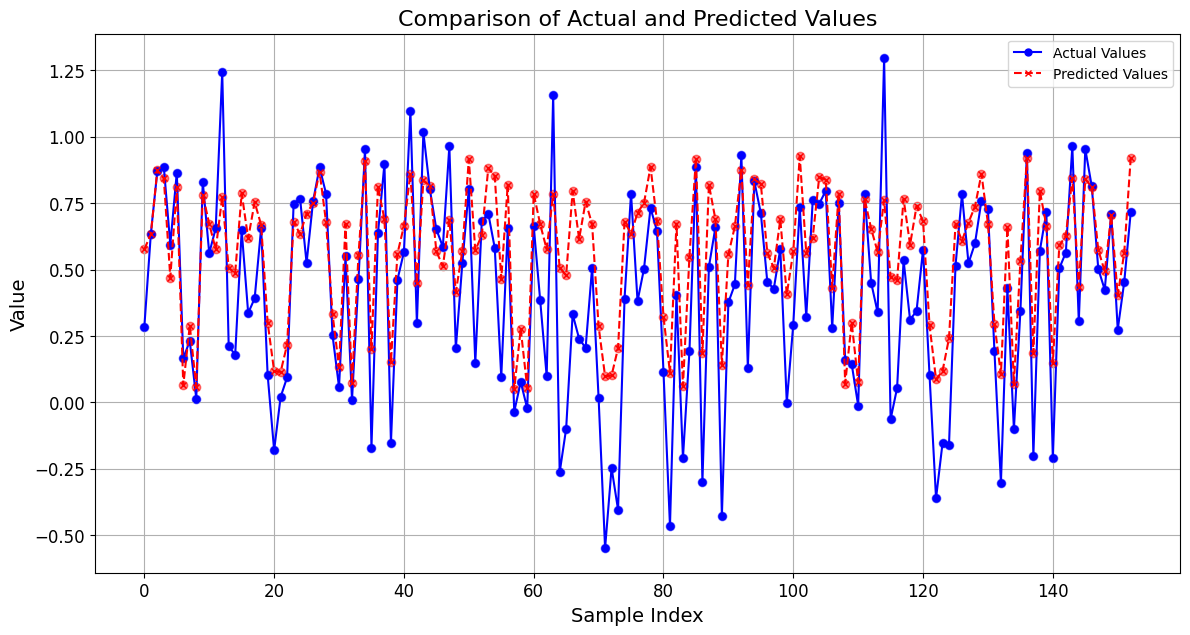

In [62]:
import matplotlib.pyplot as plt

# Selecting a subset of data for plotting for clarity
actual = y_test.flatten()[:200]  # Flatten and take first 200 samples for better visibility
pred = predictions.flatten()[:200]

# Create an enhanced plot
plt.figure(figsize=(14, 7))

# Line plot for actual and predicted values
plt.plot(actual, label='Actual Values', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(pred, label='Predicted Values', color='red', marker='x', linestyle='--', markersize=5)

# Adding scatter plot elements to emphasize data points
plt.scatter(range(len(actual)), actual, color='blue', alpha=0.5)
plt.scatter(range(len(pred)), pred, color='red', alpha=0.5)

# Enhancements
plt.title('Comparison of Actual and Predicted Values', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)  # Adding a grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

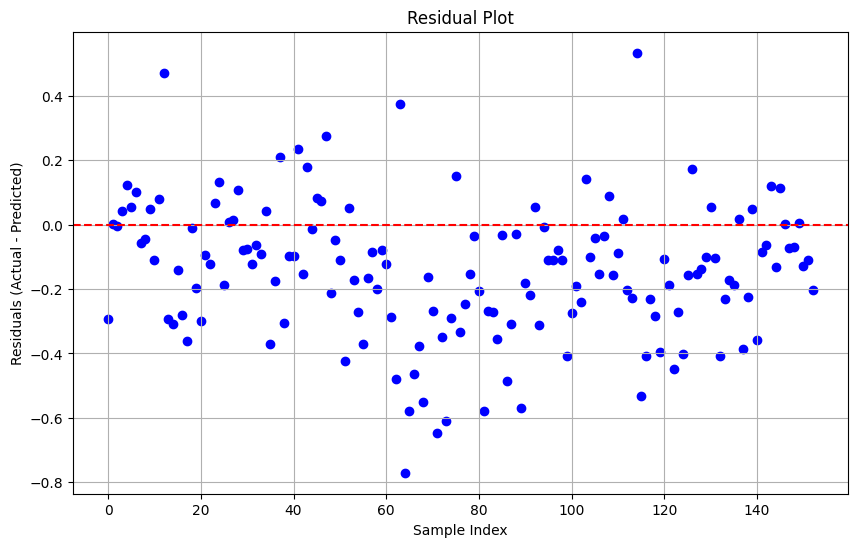

In [63]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test.flatten() - predictions.flatten()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Sample Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)

plt.show()

In [24]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

def create_model(units=50, learning_rate=0.01, dropout_rate=0.2):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(X_train.shape[2])
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define parameters
units_options = [50, 100]
learning_rates = [0.01, 0.005, 0.001]  # More granular steps
dropout_rates = [0.1, 0.2, 0.3]  # Different levels of dropout

# Initialize variables to store best parameters
best_score = float('inf')
best_params = {}

# To store MSE for plotting
mse_history = {}

kf = KFold(n_splits=5)

for units in units_options:
    for lr in learning_rates:
        for dr in dropout_rates:
            cv_scores = []
            epoch_mse = []
            for train_idx, val_idx in kf.split(X_train):
                model = create_model(units=units, learning_rate=lr, dropout_rate=dr)
                history = model.fit(X_train[train_idx], y_train[train_idx], epochs=50, batch_size=32, verbose=0, validation_data=(X_train[val_idx], y_train[val_idx]))
                mse = history.history['val_loss']
                epoch_mse.append(mse)
            average_mse = np.mean([epoch[-1] for epoch in epoch_mse])
            print(f"Units: {units}, LR: {lr}, Dropout: {dr}, Avg MSE: {average_mse}")
            mse_history[(units, lr, dr)] = np.mean(epoch_mse, axis=0)
            if average_mse < best_score:
                best_score = average_mse
                best_params = {'units': units, 'learning_rate': lr, 'dropout_rate': dr, 'mse': average_mse}

print("Best Score (MSE):", best_score)
print("Best Parameters:", best_params)

# Plotting the MSE for each combination of parameters
plt.figure(figsize=(14, 8))
for key, value in mse_history.items():
    units, lr, dr = key
    plt.plot(range(1, 51), value, label=f"Units: {units}, LR: {lr}, Dropout: {dr}")

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE over Epochs for Different Hyperparameter Combinations')
plt.legend()
plt.show()

In [ ]:
# Plot line graphs
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Units: 50
units_50 = df[df['Units'] == 50]
for dr in units_50['Dropout Rate'].unique():
    subset = units_50[units_50['Dropout Rate'] == dr]
    axes[0].plot(subset['Learning Rate'], subset['Avg MSE'], marker='o', label=f'Dropout: {dr}')

axes[0].set_title('Units: 50')
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Avg MSE')
axes[0].set_xscale('log')
axes[0].legend()

# Units: 100
units_100 = df[df['Units'] == 100]
for dr in units_100['Dropout Rate'].unique():
    subset = units_100[units_100['Dropout Rate'] == dr]
    axes[1].plot(subset['Learning Rate'], subset['Avg MSE'], marker='o', label=f'Dropout: {dr}')

axes[1].set_title('Units: 100')
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Avg MSE')
axes[1].set_xscale('log')
axes[1].legend()

plt.suptitle('Avg MSE for Different Learning Rates and Dropout Rates', fontsize=16)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics before and after normalization
metrics_before = [1.1885, 10.0563, 0.6149]
metrics_after = [0.0730, 0.0088, 0.8901]
metrics_names = ['MAE', 'MSE', 'R2']

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(metrics_names))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
bars_before = ax.bar(index, metrics_before, bar_width, label='Before Normalization')
bars_after = ax.bar(index + bar_width, metrics_after, bar_width, label='After Normalization')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics Before and After Normalization')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend()

# Displaying the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data before and after normalization
metrics = ['MAE', 'MSE', 'R²']
before_normalization = [1.18847357525917396, 10.05634423818312482, 0.614879272054348]
after_normalization = [0.07304798051664631, 0.008821847283541526, 0.8901293924216594]

# Position of bars on X axis
x = np.arange(len(metrics))

# Bar width
bar_width = 0.35

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bars
bars1 = ax.bar(x - bar_width/2, before_normalization, bar_width, label='Before Normalization', color='royalblue')
bars2 = ax.bar(x + bar_width/2, after_normalization, bar_width, label='After Normalization', color='seagreen')

# Add labels
ax.set_xlabel('Metrics', fontweight='bold')
ax.set_ylabel('Values', fontweight='bold')
ax.set_title('Model Performance Before and After Normalization')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels to the bars
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


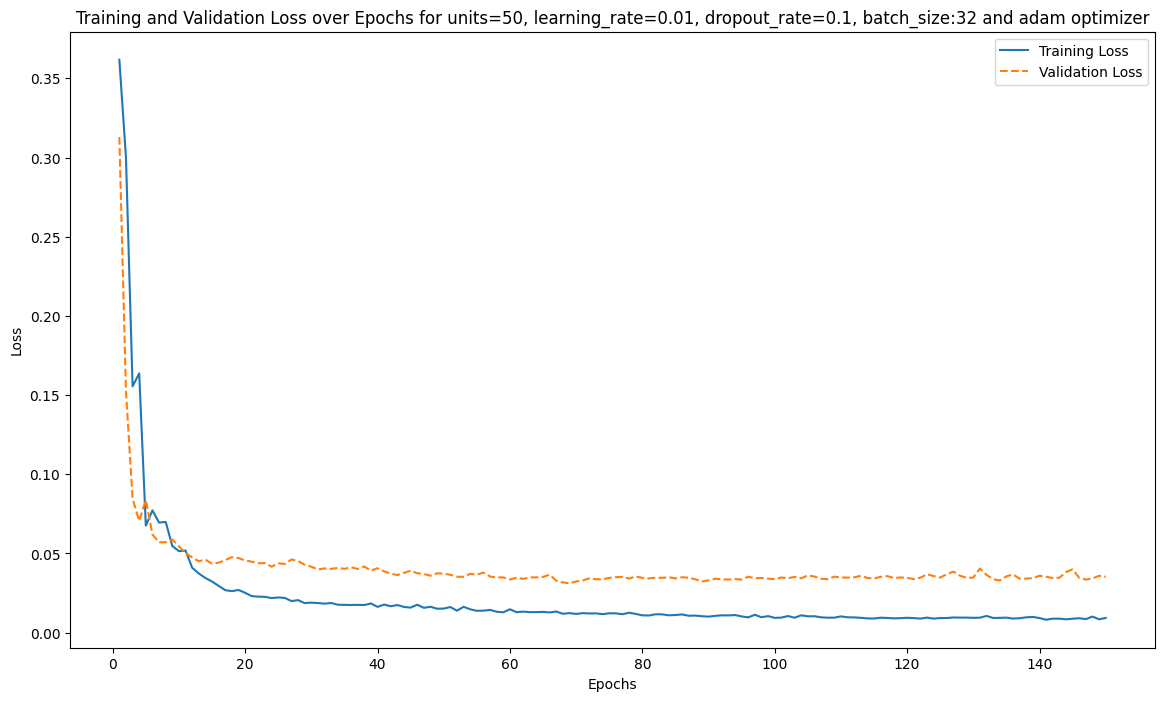

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

def create_model(units=50, learning_rate=0.01, dropout_rate=0.1):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(X_train.shape[2])
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Parameters for the specific configuration
units = 50
learning_rate = 0.01
dropout_rate = 0.1

# Initialize KFold cross-validator
kf = KFold(n_splits=5)

# To store loss for plotting
train_loss_history = []
val_loss_history = []

# Cross-validation
for train_idx, val_idx in kf.split(X_train):
    model = create_model(units=units, learning_rate=learning_rate, dropout_rate=dropout_rate)
    history = model.fit(X_train[train_idx], y_train[train_idx], epochs=150, batch_size=32, verbose=0, validation_data=(X_train[val_idx], y_train[val_idx]))
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

# Average the loss over folds
avg_train_loss = np.mean(train_loss_history, axis=0)
avg_val_loss = np.mean(val_loss_history, axis=0)

# Plotting the training and validation loss
plt.figure(figsize=(14, 8))
plt.plot(range(1, 151), avg_train_loss, label='Training Loss')
plt.plot(range(1, 151), avg_val_loss, linestyle='--', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for units=50, learning_rate=0.01, dropout_rate=0.1, batch_size:32 and adam optimizer')
plt.legend()
plt.show()

In [83]:
# Metrics before hyperparameter tuning
mae_before = 0.2046229014159637
mse_before = 0.6359034017746694
r2_before = 0.5496382249779165

# Best metrics and parameters after hyperparameter tuning
best_mse_after = 0.0075208807561781635
best_params = {
    'units': 50,
    'learning_rate': 0.01,
    'dropout_rate': 0.1,
    'batch_size': 32,
    'epochs': 150,
    'optimizer': 'adam'
}

# Print the metrics before hyperparameter tuning
print("Before Hyperparameter Tuning:")
print(f"MAE: {mae_before}")
print(f"MSE: {mse_before}")
print(f"R2: {r2_before}")

# Print the best metrics and parameters after hyperparameter tuning
print("\nHyperparameter Tuning:")
print(f"Best MSE: {best_mse_after}")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Before Hyperparameter Tuning:
MAE: 0.2046229014159637
MSE: 0.6359034017746694
R2: 0.5496382249779165

Hyperparameter Tuning:
Best MSE: 0.007520880756178163
Best Parameters:
units: 50
learning_rate: 0.01
dropout_rate: 0.1
batch_size: 32
epochs: 150
optimizer: adam


In [84]:
# Metrics before hyperparameter tuning
mae_before = 0.2046229014159637
mse_before = 0.6359034017746694
r2_before = 0.5496382249779165

# Best metrics and parameters after hyperparameter tuning
best_mse_after = 0.008897755137651224
best_params = {
    'units': '50',
    'learning_rate': '0.01',
    'dropout_rate': '0.1',
    'batch_size': '32',
    'epochs': '150',
    'optimizer': 'adam'
}

# Print the metrics before hyperparameter tuning
print("Before Hyperparameter Tuning:")
print(f"MAE: {mae_before}")
print(f"MSE: {mse_before}")
print(f"R2: {r2_before}\n")

# Print the best metrics and parameters after hyperparameter tuning on a single line
print("Hyperparameter Tuning:")
print(f"Best Score (MSE): {best_mse_after}")
print(f"Best Parameters: units: {best_params['units']}, learning_rate: {best_params['learning_rate']}, dropout_rate: {best_params['dropout_rate']}, batch_size: {best_params['batch_size']}, epochs: {best_params['epochs']}, optimizer: {best_params['optimizer']}")


Before Hyperparameter Tuning:
MAE: 0.2046229014159637
MSE: 0.6359034017746694
R2: 0.5496382249779165

Hyperparameter Tuning:
Best Score (MSE): 0.008897755137651224
Best Parameters: units: 50, learning_rate: 0.01, dropout_rate: 0.1, batch_size: 32, epochs: 150, optimizer: adam


In [82]:
model.summary()

Model: "sequential_288"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_517 (LSTM)             (None, 1, 50)             20400     
                                                                 
 dropout_454 (Dropout)       (None, 1, 50)             0         
                                                                 
 lstm_518 (LSTM)             (None, 50)                20200     
                                                                 
 dropout_455 (Dropout)       (None, 50)                0         
                                                                 
 dense_288 (Dense)           (None, 51)                2601      
                                                                 
Total params: 43201 (168.75 KB)
Trainable params: 43201 (168.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####Conv LSTM

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 't1' is your DataFrame and has been preprocessed correctly.
train_df = t1_norm[t1_norm['Year'] <= 2016]
test_df = t1_norm[t1_norm['Year'] >= 2017]

# Normalize features
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # Exclude 'Year'
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])

# Reshape data for ConvLSTM [samples, timesteps, rows, columns, channels]
# Artificially treat each feature as a 1D spatial (rows=1, columns=number of features)
X_train = train_scaled.reshape(train_scaled.shape[0], 1, 1, train_scaled.shape[1], 1)
X_test = test_scaled.reshape(test_scaled.shape[0], 1, 1, test_scaled.shape[1], 1)

# Prepare targets
y_train = train_df[features].values
y_test = test_df[features].values

# Define ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(1, 1, len(features), 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(len(features))
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train, y_train, epochs=150, verbose=1)

# Predict using the model
predictions = model.predict(X_test)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"R2: {r2}")

####Gated recurring Unit

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 't1' is your DataFrame and has been preprocessed correctly.
train_df = t1_norm[t1_norm['Year'] <= 2015]
test_df = t1_norm[t1_norm['Year'] >= 2016]

# Normalize features
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # Exclude 'Year'
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])

# Reshape data for GRU [samples, timesteps, features]
X_train = train_scaled.reshape((train_scaled.shape[0], 1, train_scaled.shape[1]))
X_test = test_scaled.reshape((test_scaled.shape[0], 1, test_scaled.shape[1]))

# Prepare targets
y_train = train_df[features].values
y_test = test_df[features].values

# Define GRU model
model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    GRU(32, return_sequences=False),
    Dense(len(features))
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict using the model
predictions = model.predict(X_test)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"R2: {r2}")

####XGBOOST

In [ ]:
pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Assuming 't1' is your DataFrame and has been preprocessed correctly.
train_df = t1[t1['Year'] <= 2015]
test_df = t1[t1['Year'] >= 2016]

# Normalize the features for better performance
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # Exclude 'Year' to focus on features
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Prepare the targets, which are the same as the features in this regression scenario
y_train = train_df[features].values
y_test = test_df[features].values

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(train_features, y_train)

# Predict using the model
predictions = model.predict(test_features)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"Aggregated MAE: {mae}")
print(f"Aggregated MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated R2: {r2}")

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Assuming 't1' is your DataFrame and has been preprocessed correctly.
train_df = t1_norm[t1_norm['Year'] <= 2015]
test_df = t1_norm[t1_norm['Year'] >= 2016]

# Normalize the features for better performance
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # Exclude 'Year' to focus on features
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

# Prepare the targets, which are the same as the features in this regression scenario
y_train = train_df[features].values
y_test = test_df[features].values

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(train_features, y_train)

# Predict using the model
predictions = model.predict(test_features)

# Calculate MSE, RMSE, MAE, and R2 for all states combined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test.flatten(), predictions.flatten())

# Print the aggregated metrics
print(f"Aggregated MAE: {mae}")
print(f"Aggregated MSE: {mse}")
#print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated R2: {r2}")

####Bayes Optimized XGBOOST

In [ ]:
pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization

# Assuming 't1' is your DataFrame and has been preprocessed correctly.
train_df = t1[t1['Year'] <= 2015]
test_df = t1[t1['Year'] >= 2016]

scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # All columns except 'Year'
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

y_train = train_df[features].values
y_test = test_df[features].values

# Define the XGBoost objective function to minimize
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    model = XGBRegressor(**params)
    model.fit(train_features, y_train)
    predictions = model.predict(test_features)
    mse = mean_squared_error(y_test, predictions)
    return -mse  # Negative MSE because Bayesian optimization is a maximization tool

# Define parameter bounds for Bayesian Optimization
pbounds = {'max_depth': (3, 10),
           'gamma': (0, 5),
           'colsample_bytree': (0.5, 1.0)}

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds=pbounds,
    random_state=1,
)

# Perform optimization
optimizer.maximize(init_points=3, n_iter=10)

# Print the best parameters found
print(optimizer.max)

# Train final model using the best parameters
params = optimizer.max['params']
params['max_depth'] = int(params['max_depth'])  # Ensure integer max_depth

final_model = XGBRegressor(**params)
final_model.fit(train_features, y_train)

# Predict using the final model
final_predictions = final_model.predict(test_features)

# Calculate final MSE, RMSE, MAE, and R2
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)
final_r2 = r2_score(y_test.flatten(), final_predictions.flatten())

# Print final metrics
print(f"MAE: {final_mae}")
print(f"MSE: {final_mse}")
#print(f"Final RMSE: {final_rmse}")
print(f"R2: {final_r2}")

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization

# Assuming 't1' is your DataFrame and has been preprocessed correctly.
train_df = t1_norm[t1_norm['Year'] <= 2015]
test_df = t1_norm[t1_norm['Year'] >= 2016]

scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # All columns except 'Year'
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

y_train = train_df[features].values
y_test = test_df[features].values

# Define the XGBoost objective function to minimize
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    model = XGBRegressor(**params)
    model.fit(train_features, y_train)
    predictions = model.predict(test_features)
    mse = mean_squared_error(y_test, predictions)
    return -mse  # Negative MSE because Bayesian optimization is a maximization tool

# Define parameter bounds for Bayesian Optimization
pbounds = {'max_depth': (3, 10),
           'gamma': (0, 5),
           'colsample_bytree': (0.5, 1.0)}

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds=pbounds,
    random_state=1,
)

# Perform optimization
optimizer.maximize(init_points=3, n_iter=10)

# Print the best parameters found
print(optimizer.max)

# Train final model using the best parameters
params = optimizer.max['params']
params['max_depth'] = int(params['max_depth'])  # Ensure integer max_depth

final_model = XGBRegressor(**params)
final_model.fit(train_features, y_train)

# Predict using the final model
final_predictions = final_model.predict(test_features)

# Calculate final MSE, RMSE, MAE, and R2
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)
final_r2 = r2_score(y_test.flatten(), final_predictions.flatten())

# Print final metrics
print(f"MAE: {final_mae}")
print(f"MSE: {final_mse}")
#print(f"Final RMSE: {final_rmse}")
print(f"R2: {final_r2}")

In [ ]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming 't1' and feature preparation is as previously described
train_df = t1_norm[t1_norm['Year'] <= 2015]
test_df = t1_norm[t1_norm['Year'] >= 2016]

# Normalize features
scaler = MinMaxScaler()
features = train_df.columns.difference(['Year'])  # All columns except 'Year'
train_features = scaler.fit_transform(train_df[features])
test_features = scaler.transform(test_df[features])

y_train = train_df[features].values
y_test = test_df[features].values

# Define the XGBoost objective function to maximize (R2 score)
def xgb_r2_score(max_depth, gamma, colsample_bytree, subsample, eta):
    params = {
        'eval_metric': 'rmse',
        'max_depth': int(max_depth),
        'gamma': gamma,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eta': eta,
        'objective': 'reg:squarederror'
    }
    model = xgb.XGBRegressor(**params)
    model.fit(train_features, y_train)
    predictions = model.predict(test_features)
    return r2_score(y_test, predictions)

# Set bounds for hyperparameters
pbounds = {
    'max_depth': (3, 12),
    'gamma': (0, 1),
    'colsample_bytree': (0.5, 1.0),
    'subsample': (0.5, 1.0),
    'eta': (0.01, 0.3)
}

optimizer = BayesianOptimization(f=xgb_r2_score, pbounds=pbounds, random_state=42)

# Perform optimization
optimizer.maximize(init_points=10, n_iter=30)

# Train final model with the best parameters found
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])  # ensure max_depth is an integer
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(train_features, y_train)

# Calculate final R2 score
final_predictions = final_model.predict(test_features)
final_r2 = r2_score(y_test, final_predictions)

print(f"Final R2: {final_r2}")

####ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data
state_data = t1_norm[['Year', 'California']]  # Example: Modeling for California
state_data['Year'] = pd.to_datetime(state_data['Year'], format='%Y')
state_data.set_index('Year', inplace=True)
state_data = state_data.dropna()  # Ensure there are no NaN values

# Split data
train = state_data[:'2015']
test = state_data['2016':]

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))  # Example order, adjust based on model diagnostics
fitted_model = model.fit()

# Forecast
forecast = fitted_model.get_forecast(steps=len(test))
predictions = forecast.predicted_mean

# Calculate performance metrics
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)

# Display metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
#print(f"RMSE: {rmse}")
print(f"R2: {r2}")

In [ ]:
pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Load your DataFrame 't1'
# Assume 't1' has 'Year' and all states as columns

# Initialize lists to store metrics for all states
all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

# Iterate over each state column except 'Year'
for state in t1.columns[1:]:  # Skip 'Year' column
    data = t1[['Year', state]].dropna().set_index('Year')
    train_data = data[data.index <= 2015][state]
    test_data = data[data.index > 2015][state]

    # Define and fit the ARIMA model
    # Here we use a simple (1,1,1) model for demonstration; adjust as necessary
    model = ARIMA(train_data, order=(1, 1, 1))
    fitted_model = model.fit()

    # Predict using the model
    predictions = fitted_model.get_forecast(steps=len(test_data))
    prediction_means = predictions.predicted_mean

    # Calculate performance metrics
    mse = mean_squared_error(test_data, prediction_means)
    mae = mean_absolute_error(test_data, prediction_means)
    rmse = sqrt(mse)
    r2 = r2_score(test_data, prediction_means)

    # Append to lists
    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

# Calculate averages of the metrics across all states
avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

# Print aggregated metrics
print(f'MAE: {avg_mae}')
print(f'MSE: {avg_mse}')
#print(f'RMSE: {avg_rmse}')
print(f'R2: {avg_r2}')

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def check_stationarity(series):
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05  # Returns True if the series is stationary

# Assuming 't1' has 'Year' and all state columns
data = t1.set_index('Year')
data.index = pd.to_datetime(data.index, format='%Y')

# Initialize lists to store metrics for all states
all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

# Iterate over each state column
for state in data.columns[1:]:  # Skip 'Year'
    series = data[state].dropna()  # Ensure no NaNs

    # Check and make the series stationary if necessary
    if not check_stationarity(series):
        series = series.diff().dropna()  # Differencing to make stationary

    # Split the data
    train_data = series[:'2015']
    test_data = series['2016':]

    if len(train_data) < 5 or len(test_data) < 1:  # Skip if not enough data
        continue

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(1, 0, 1))  # Adjust the order as needed
    fitted_model = model.fit()

    # Predict using the model
    forecast = fitted_model.get_forecast(steps=len(test_data))
    prediction_means = forecast.predicted_mean

    # Calculate performance metrics
    mse = mean_squared_error(test_data, prediction_means)
    mae = mean_absolute_error(test_data, prediction_means)
    rmse = sqrt(mse)
    r2 = r2_score(test_data, prediction_means)

    # Append metrics to lists
    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

# Calculate averages of the metrics across all states
avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

# Print aggregated metrics
print(f'MAE: {avg_mae}')
print(f'MSE: {avg_mse}')
#print(f'Aggregated RMSE across all states: {avg_rmse}')
print(f'R2: {avg_r2}')

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming 't1' has 'Year' and all state columns, with 'Year' as index
data = t1.set_index('Year')
data.index = pd.to_datetime(data.index, format='%Y')

# Initialize lists to store metrics for all states
all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

# Define a generic SARIMA model order and seasonal order
# These should ideally be customized based on each state's data characteristics
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming annual seasonality with period of 12 months

# Iterate over each state column
for state in data.columns[1:]:  # Exclude 'Year' if it's in the columns
    series = data[state].dropna()  # Ensure no NaNs which can affect modeling

    # Split the data
    train_data = series[:'2015']
    test_data = series['2016':]

    if len(train_data) < 5 or len(test_data) < 1:  # Skip if not enough data
        continue

    # Fit the SARIMA model
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    fitted_model = model.fit(disp=False)  # disp=False to avoid convergence messages

    # Predict using the model
    predictions = fitted_model.get_forecast(steps=len(test_data))
    prediction_means = predictions.predicted_mean

    # Calculate performance metrics
    mse = mean_squared_error(test_data, prediction_means)
    mae = mean_absolute_error(test_data, prediction_means)
    rmse = sqrt(mse)
    r2 = r2_score(test_data, prediction_means)

    # Append metrics to lists
    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

# Calculate averages of the metrics across all states
avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

# Print aggregated metrics
print(f'Aggregated MAE across all states: {avg_mae}')
print(f'Aggregated MSE across all states: {avg_mse}')
print(f'Aggregated RMSE across all states: {avg_rmse}')
print(f'Aggregated R2 across all states: {avg_r2}')


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 't1' is your DataFrame and it's already loaded
# Let's say we are focusing on 'California' for the ARIMA model

# Step 1: Prepare the data
# Ensure the data is in a time series format, with 'Year' as the index and values as emissions
t1['Year'] = pd.to_datetime(t1['Year'], format='%Y')  # Ensure Year is datetime type if not already
california_data = t1.set_index('Year')['California']

# Step 2: Fit the ARIMA model
# Here, we use an ARIMA(1,1,1) model as an example; these parameters (p,d,q) might need tuning
model = ARIMA(california_data, order=(1,1,1))
fitted_model = model.fit()

# Step 3: Make forecasts
# For demonstration, we forecast the next 5 years
forecast = fitted_model.forecast(steps=5)

# Step 4: Plot the results
plt.figure(figsize=(10, 5))
plt.plot(california_data, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of CO2 Emissions for California')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()


####Prophet

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming 't1' has 'Year' and all state columns, with 'Year' as a standard column
data = t1.copy()
data['Year'] = pd.to_datetime(data['Year'], format='%Y')  # Ensure the 'Year' is datetime type

# Initialize lists to store metrics for all states
all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

# Iterate over each state column
for state in data.columns[1:]:  # Skip 'Year' column
    # Prepare the DataFrame for Prophet
    df = pd.DataFrame({
        'ds': data['Year'],
        'y': data[state]
    }).dropna()  # Drop NA values to avoid issues during fitting

    # Split the data into training and testing
    train_data = df[df['ds'] <= pd.to_datetime('2015')]
    test_data = df[df['ds'] > pd.to_datetime('2015')]

    # Initialize and fit the Prophet model
    m = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    m.fit(train_data)

    # Make a future dataframe for predictions
    future = m.make_future_dataframe(periods=len(test_data), freq='YS')  # 'YS' - yearly start frequency
    forecast = m.predict(future)

    # Calculate performance metrics on the test set
    predictions = forecast[-len(test_data):]['yhat']  # Slice to get predictions corresponding to the test data
    mse = mean_squared_error(test_data['y'], predictions)
    mae = mean_absolute_error(test_data['y'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['y'], predictions)

    # Append metrics to lists
    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

# Calculate averages of the metrics across all states
avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

# Print aggregated metrics
print(f'Aggregated MAE across all states: {avg_mae}')
print(f'Aggregated MSE across all states: {avg_mse}')
print(f'Aggregated RMSE across all states: {avg_rmse}')
print(f'Aggregated R2 across all states: {avg_r2}')

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming 't1' has 'Year' and all state columns, with 'Year' as a standard column
data = t1_norm.copy()
data['Year'] = pd.to_datetime(data['Year'], format='%Y')  # Ensure the 'Year' is datetime type

# Initialize lists to store metrics for all states
all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

# Iterate over each state column
for state in data.columns[1:]:  # Skip 'Year' column
    # Prepare the DataFrame for Prophet
    df = pd.DataFrame({
        'ds': data['Year'],
        'y': data[state]
    }).dropna()  # Drop NA values to avoid issues during fitting

    # Split the data into training and testing
    train_data = df[df['ds'] <= pd.to_datetime('2015')]
    test_data = df[df['ds'] > pd.to_datetime('2015')]

    # Initialize and fit the Prophet model
    m = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    m.fit(train_data)

    # Make a future dataframe for predictions
    future = m.make_future_dataframe(periods=len(test_data), freq='YS')  # 'YS' - yearly start frequency
    forecast = m.predict(future)

    # Calculate performance metrics on the test set
    predictions = forecast[-len(test_data):]['yhat']  # Slice to get predictions corresponding to the test data
    mse = mean_squared_error(test_data['y'], predictions)
    mae = mean_absolute_error(test_data['y'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['y'], predictions)

    # Append metrics to lists
    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

# Calculate averages of the metrics across all states
avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

# Print aggregated metrics
print(f'Aggregated MAE across all states: {avg_mae}')
print(f'Aggregated MSE across all states: {avg_mse}')
print(f'Aggregated RMSE across all states: {avg_rmse}')
print(f'Aggregated R2 across all states: {avg_r2}')

In [ ]:
t1_norm.columns

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming 't1' has 'Year' and all state columns, with 'Year' as a standard column
data = t1_norm.copy()
data['Year'] = pd.to_datetime(data['Year'], format='%Y')  # Ensure the 'Year' is datetime type

all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

for state in data.columns[1:]:  # Skip 'Year'
    df = pd.DataFrame({
        'ds': data['Year'],
        'y': data[state]
    }).dropna()

    # Define holidays or known events here if applicable
    holidays = pd.DataFrame({
        'holiday': 'example_holiday',
        'ds': pd.to_datetime(['2024-01-01']),
        'lower_window': 0,
        'upper_window': 1,
    })

    # Initialize and configure the Prophet model
    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=holidays
    )
    m.add_seasonality(name='yearly', period=365.25, fourier_order=10)

    train_data = df[df['ds'] <= pd.to_datetime('2015')]
    test_data = df[df['ds'] > pd.to_datetime('2015')]

    m.fit(train_data)

    # Make future dataframe and predict
    future = m.make_future_dataframe(periods=len(test_data), freq='YS')
    forecast = m.predict(future)

    predictions = forecast[-len(test_data):]['yhat']
    mse = mean_squared_error(test_data['y'], predictions)
    mae = mean_absolute_error(test_data['y'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['y'], predictions)

    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

print(f'Aggregated MAE: {avg_mae}')
print(f'Aggregated MSE: {avg_mse}')
#print(f'Aggregated RMSE: {avg_rmse}')
print(f'Aggregated R2: {avg_r2}')

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

# After fitting the model
fig1 = plot_plotly(m, forecast)  # Plot forecast
fig2 = plot_components_plotly(m, forecast)  # Plot components

fig1.show()
fig2.show()


In [ ]:
##dont run
c
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

data = t1_norm.copy()
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

for state in data.columns[1:]:
    df = pd.DataFrame({
        'ds': data['Year'],
        'y': data[state]
    }).dropna()

    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode='multiplicative'
    )
    m.add_seasonality(name='yearly', period=365.25, fourier_order=10)

    train_data = df[df['ds'] <= pd.to_datetime('2015')]
    test_data = df[df['ds'] > pd.to_datetime('2015')]

    m.fit(train_data)

    # Cross-validation
    df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv)
    print(df_p[['horizon', 'mae', 'mse', 'rmse']])  # Exclude 'r2' from print statement

    future = m.make_future_dataframe(periods=len(test_data), freq='YS')
    forecast = m.predict(future)

    predictions = forecast[-len(test_data):]['yhat']
    mse = mean_squared_error(test_data['y'], predictions)
    mae = mean_absolute_error(test_data['y'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['y'], predictions)

    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

print(f'Aggregated MAE: {avg_mae}')
print(f'Aggregated MSE: {avg_mse}')
print(f'Aggregated RMSE: {avg_rmse}')
print(f'Aggregated R2: {avg_r2}')

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

data = t1_norm.copy()
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

all_mae, all_mse, all_rmse, all_r2 = [], [], [], []

for state in data.columns[1:]:
    df = pd.DataFrame({
        'ds': data['Year'],
        'y': data[state]
    }).dropna()

    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode='multiplicative'
    )
    m.add_seasonality(name='yearly', period=365.25, fourier_order=5)  # Lower Fourier order

    train_data = df[df['ds'] <= pd.to_datetime('2015')]
    test_data = df[df['ds'] > pd.to_datetime('2015')]

    m.fit(train_data)

    # Reduced cross-validation complexity
    df_cv = cross_validation(m, initial='1825 days', period='365 days', horizon='180 days')
    df_p = performance_metrics(df_cv)
    print(df_p[['horizon', 'mae', 'mse', 'rmse']])

    future = m.make_future_dataframe(periods=len(test_data), freq='YS')
    forecast = m.predict(future)

    predictions = forecast[-len(test_data):]['yhat']
    mse = mean_squared_error(test_data['y'], predictions)
    mae = mean_absolute_error(test_data['y'], predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test_data['y'], predictions)

    all_mae.append(mae)
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_r2.append(r2)

avg_mae = np.mean(all_mae)
avg_mse = np.mean(all_mse)
avg_rmse = np.mean(all_rmse)
avg_r2 = np.mean(all_r2)

print(f'Aggregated MAE: {avg_mae}')
print(f'Aggregated MSE: {avg_mse}')
print(f'Aggregated RMSE: {avg_rmse}')
print(f'Aggregated R2: {avg_r2}')

###New data

In [1]:
import pandas as pd

# Load the dataset to examine the 'share_global_co2' variable
data_path = "data.csv"
data = pd.read_csv(data_path)
data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
data.shape

(13524, 79)

In [3]:
# Filter to relevant columns and remove rows with missing 'share_global_co2' values
filtered_data = data[['year', 'share_global_co2']].dropna()

# Examine the range and distribution of years in the filtered data
filtered_data['year'].describe(), filtered_data['share_global_co2'].describe()

(count    8076.000000
 mean     1942.502229
 std        65.765837
 min      1750.000000
 25%      1909.000000
 50%      1962.000000
 75%      1993.000000
 max      2022.000000
 Name: year, dtype: float64,
 count    8076.000000
 mean        0.815736
 std         3.816093
 min         0.000000
 25%         0.001000
 50%         0.017000
 75%         0.209000
 max        58.614000
 Name: share_global_co2, dtype: float64)

In [4]:
filtered_data.shape

(8076, 2)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'share_global_co2' data
scaler = MinMaxScaler()
filtered_data['normalized_co2'] = scaler.fit_transform(filtered_data[['share_global_co2']])

# Show the head of the normalized data
filtered_data.head()

,year,share_global_co2,normalized_co2
99,1949,0.000,0.000000
100,1950,0.001,0.000017
101,1951,0.001,0.000017
102,1952,0.001,0.000017
103,1953,0.002,0.000034


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Prepare the data for LSTM
sequence_length = 5
features = filtered_data['normalized_co2'].values
X, y = create_sequences(features, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.00007)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), batch_size=72, verbose=1)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
#print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

51/51 [==============================] - 1s 2ms/step


NameError: name 'sqrt' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Assuming your history object is obtained from the model.fit method
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=72, verbose=1)

# Accessing the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, 51, 1))  # Adjust x-axis ticks to match your specific range
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(predictions.flatten(), label='Predicted', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Normalized Global CO2 Share')
plt.legend()
plt.show()

In [8]:
# Reload the dataset to refresh the context
data = pd.read_csv('data.csv')  # Adjust the path to your CSV file
country_data = data[data['country'].isin(['United States', 'India', 'China', 'Russia'])]
last_years_data = country_data.groupby('country')['year'].max()
print(last_years_data)

country
China            2022
India            2022
Russia           2022
United States    2022
Name: year, dtype: int64


In [9]:
country_data

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8950,China,1850,CHN,409821554.0,3.534960e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8951,China,1851,CHN,407570489.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.668,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN
8952,China,1852,CHN,404611476.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.392,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN
8953,China,1853,CHN,400951224.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.178,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN
8954,China,1854,CHN,397324067.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.931,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45774,United States,2018,USA,332140032.0,1.814065e+13,38.971,0.117,5377.797,165.635,3.178,...,8.143,17.734,0.035,0.226,0.272,0.011,5935.52,6154.65,420.355,7.816
45775,United States,2019,USA,334319680.0,NaN,40.896,0.122,5262.145,-115.652,-2.151,...,8.085,17.599,0.035,0.228,0.275,0.011,5819.48,6039.74,423.539,8.049
45776,United States,2020,USA,335942016.0,NaN,40.688,0.121,4714.628,-547.517,-10.405,...,8.294,17.466,0.035,0.230,0.277,0.011,5289.13,5505.18,471.929,10.010
45777,United States,2021,USA,336997632.0,NaN,41.312,0.123,5032.213,317.585,6.736,...,8.242,17.335,0.035,0.233,0.279,0.011,NaN,NaN,539.960,10.730


In [10]:
# Filter data for the specified countries and relevant columns
filtered_data = data[(data['country'].isin(['United States', 'India', 'Russia', 'China'])) & (data['year'] <= 2023)]
filtered_data = filtered_data[['country', 'year', 'co2']]

# Pivot data to have years as rows and countries as columns
pivoted_data = filtered_data.pivot(index='year', columns='country', values='co2').dropna()

# Show the prepared dataset for modeling
pivoted_data.head(), pivoted_data.tail()

(country   China   India  Russia  United States
 year                                          
 1907     19.894  21.772  56.588       1203.861
 1908     22.736  24.908  56.935       1052.813
 1909     24.252  24.143  60.102       1165.706
 1910     25.009  23.487  58.942       1271.582
 1911     24.631  24.782  61.110       1258.667,
 country      China     India    Russia  United States
 year                                                 
 2018     10353.935  2593.058  1712.494       5377.797
 2019     10721.042  2612.888  1705.031       5262.145
 2020     10914.012  2421.552  1632.929       4714.628
 2021     11336.233  2674.222  1711.993       5032.213
 2022     11396.777  2829.644  1652.177       5057.304)

In [11]:
pivoted_data

country,China,India,Russia,United States
year,,,,
1907,19.894,21.772,56.588,1203.861
1908,22.736,24.908,56.935,1052.813
1909,24.252,24.143,60.102,1165.706
1910,25.009,23.487,58.942,1271.582
1911,24.631,24.782,61.110,1258.667
...,...,...,...,...
2018,10353.935,2593.058,1712.494,5377.797
2019,10721.042,2612.888,1705.031,5262.145
2020,10914.012,2421.552,1632.929,4714.628


In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'pivoted_data' is your DataFrame
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(pivoted_data)

# Convert scaled_data back to DataFrame for easier handling
scaled_data_df = pd.DataFrame(scaled_data, columns=pivoted_data.columns, index=pivoted_data.index)

# Show the scaled data
scaled_data_df

country,China,India,Russia,United States
year,,,,
1907,0.000252,0.000000,0.014940,0.029738
1908,0.000502,0.001117,0.015077,0.000000
1909,0.000635,0.000844,0.016336,0.022226
1910,0.000701,0.000611,0.015875,0.043070
1911,0.000668,0.001072,0.016736,0.040527
...,...,...,...,...
2018,0.908360,0.915742,0.672759,0.851480
2019,0.940620,0.922804,0.669794,0.828711
2020,0.957577,0.854661,0.641151,0.720919


In [13]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Number of past years to consider for predicting the next year
n_steps = 3
X, y = create_sequences(scaled_data, n_steps)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, scaled_data.shape[1])),
    Dense(scaled_data.shape[1])
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Assuming using the last few (e.g., last 5 years) as validation data
X_train, X_val = X[:-5], X[-5:]
y_train, y_val = y[:-5], y[-5:]

model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
4/4 [==============================] - 5s 290ms/step - loss: 0.2287 - val_loss: 0.8075
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 0.2109 - val_loss: 0.7505
Epoch 3/50
4/4 [==============================] - 0s 46ms/step - loss: 0.1950 - val_loss: 0.6947
Epoch 4/50
4/4 [==============================] - 0s 27ms/step - loss: 0.1791 - val_loss: 0.6403
Epoch 5/50
4/4 [==============================] - 0s 25ms/step - loss: 0.1638 - val_loss: 0.5847
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1475 - val_loss: 0.5262
Epoch 7/50
4/4 [==============================] - 0s 25ms/step - loss: 0.1318 - val_loss: 0.4644
Epoch 8/50
4/4 [==============================] - 0s 24ms/step - loss: 0.1138 - val_loss: 0.4022
Epoch 9/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0954 - val_loss: 0.3416
Epoch 10/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0773 - val_loss: 0.2784
Epoch 11/50
4/4 [===========

In [17]:
from sklearn.metrics import mean_squared_error

# Example: Evaluating on the validation set
predictions_val = model.predict(X_val)
mse = mean_squared_error(y_val, predictions_val)
print(f'Mean Squared Error on Validation Set: {mse}')

1/1 [==============================] - 0s 41ms/step
Mean Squared Error on Validation Set: 0.012273822128085535


In [18]:
import numpy as np
import pandas as pd

# Check the shape of last_sequence to ensure it includes all four countries
print("Shape of last_sequence:", last_sequence.shape)

# Generate predictions
future_steps = 3
predictions = []
current_sequence = last_sequence.reshape(1, n_steps, scaled_data.shape[1])
for _ in range(future_steps):
    next_year_pred = model.predict(current_sequence)[0]
    print("Shape of next_year_pred:", next_year_pred.shape)  # Check the shape of predictions
    predictions.append(next_year_pred)
    next_year_pred = next_year_pred.reshape(1, 1, scaled_data.shape[1])
    current_sequence = np.append(current_sequence[:, 1:, :], next_year_pred, axis=1)

# Inverse transform to get actual values
predictions_actual = scaler.inverse_transform(predictions)
print("Shape of predictions_actual:", predictions_actual.shape)  # Verify the shape before creating DataFrame

# Ensure you have the correct number of columns
years = [2024, 2025, 2026]
countries = ['China', 'India', 'Russia', 'United States']

if predictions_actual.shape[1] == len(countries):  # Check if the number of predicted columns matches the number of countries
    predictions_df = pd.DataFrame(predictions_actual, index=years, columns=countries)
    print(predictions_df)
else:
    print("Error: The number of predicted columns does not match the number of countries.")


Shape of last_sequence: (3, 4)
1/1 [==============================] - 0s 38ms/step
Shape of next_year_pred: (4,)
1/1 [==============================] - 0s 158ms/step
Shape of next_year_pred: (4,)
1/1 [==============================] - 0s 88ms/step
Shape of next_year_pred: (4,)
Shape of predictions_actual: (3, 4)
             China        India       Russia  United States
2024  12801.981769  2759.137647  1319.537702    5741.610301
2025  13639.473501  2948.960873  1308.035273    5906.638200
2026  14230.176358  3085.283421  1234.989933    5928.826439


In [19]:
# Adjust the future_steps to predict for four years instead of three
future_steps = 4
last_sequence = scaled_data[-n_steps:]
current_sequence = last_sequence.reshape(1, n_steps, scaled_data.shape[1])

predictions = []
for _ in range(future_steps):
    next_year_pred = model.predict(current_sequence)[0]
    predictions.append(next_year_pred)
    next_year_pred = next_year_pred.reshape(1, 1, scaled_data.shape[1])
    current_sequence = np.append(current_sequence[:, 1:, :], next_year_pred, axis=1)

# Inverse transform to get actual values
predictions_actual = scaler.inverse_transform(predictions)

# Assuming predictions_actual contains the inverse-transformed predictions
years = [2023, 2024, 2025, 2026]
countries = ['China', 'India', 'Russia', 'United States']

# Convert predictions to a DataFrame for better readability
predictions_df = pd.DataFrame(predictions_actual, index=years, columns=countries)

# Display the DataFrame
print(predictions_df)

1/1 [==============================] - 0s 52ms/step
             China        India       Russia  United States
2023  12801.981769  2759.137647  1319.537702    5741.610301
2024  13639.473501  2948.960873  1308.035273    5906.638200
2025  14230.176358  3085.283421  1234.989933    5928.826439
2026  14878.472465  3241.253288  1146.141995    5927.738038


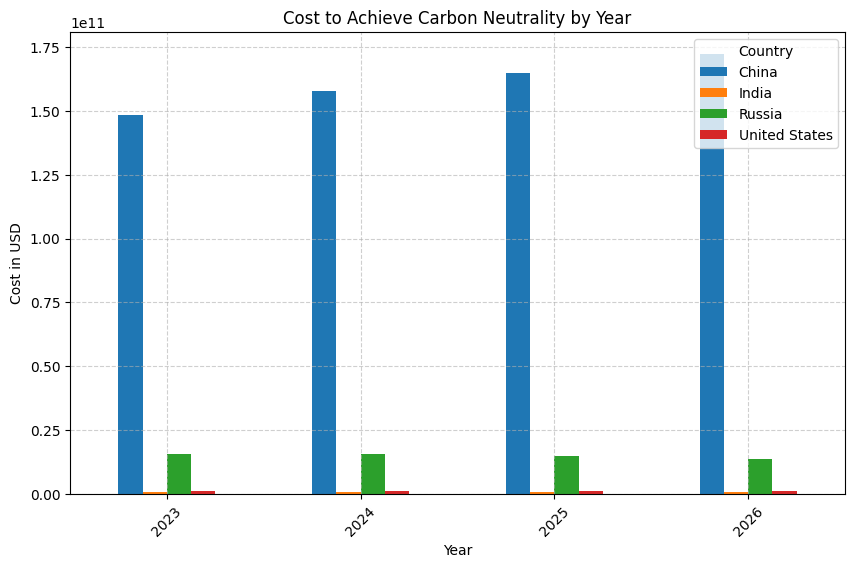

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the carbon credit costs per ton for each country (USD per metric ton)
carbon_credit_costs = pd.Series({
    'China': 11.58,    # USD per metric ton
    'India': 0.214,    # USD per metric ton
    'Russia': 12,      # USD per metric ton
    'United States': 0.214  # USD per metric ton
}, name='Cost per Ton')

# Assuming 'predictions_df' contains the predicted CO2 emissions for each country in million metric tons
# Calculate the excess emissions
target_emissions = 0  # target is zero for full neutrality
excess_emissions = predictions_df - target_emissions

# Multiply by 1,000,000 to convert million metric tons to metric tons
# Calculate costs by multiplying the excess emissions by the respective carbon credit cost per ton
costs_to_neutralize = excess_emissions.mul(carbon_credit_costs, axis=1) * 1e6  # Convert millions to units

# Plotting
costs_to_neutralize.plot(kind='bar', figsize=(10, 6))
plt.title('Cost to Achieve Carbon Neutrality by Year')
plt.ylabel('Cost in USD')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [21]:
costs_to_neutralize

,China,India,Russia,United States
2023,1.482469e+11,5.904555e+08,1.583445e+10,1.228705e+09
2024,1.579451e+11,6.310776e+08,1.569642e+10,1.264021e+09
2025,1.647854e+11,6.602507e+08,1.481988e+10,1.268769e+09
2026,1.722927e+11,6.936282e+08,1.375370e+10,1.268536e+09


In [22]:
import pandas as pd

# Sample DataFrame 'costs_to_neutralize' as seen in the image
data = {
    'China': [1.464974e+11, 1.563664e+11, 1.633603e+11, 1.731546e+11],
    'India': [5.676742e+08, 6.081212e+08, 6.439583e+08, 6.886133e+08],
    'Russia': [1.475506e+10, 1.318263e+10, 1.088951e+10, 8.029967e+09],
    'United States': [1.141095e+09, 1.168953e+09, 1.167791e+09, 1.164584e+09]
}
years = [2023, 2024, 2025, 2026]
costs_to_neutralize = pd.DataFrame(data, index=years)

def format_currency(x):
    return "${:,.2f}".format(x)

# Apply the formatting function to each element in the DataFrame
formatted_df = costs_to_neutralize.applymap(format_currency)

print(formatted_df)


                    China            India              Russia  \
2023  $146,497,400,000.00  $567,674,200.00  $14,755,060,000.00   
2024  $156,366,400,000.00  $608,121,200.00  $13,182,630,000.00   
2025  $163,360,300,000.00  $643,958,300.00  $10,889,510,000.00   
2026  $173,154,600,000.00  $688,613,300.00   $8,029,967,000.00   

          United States  
2023  $1,141,095,000.00  
2024  $1,168,953,000.00  
2025  $1,167,791,000.00  
2026  $1,164,584,000.00  


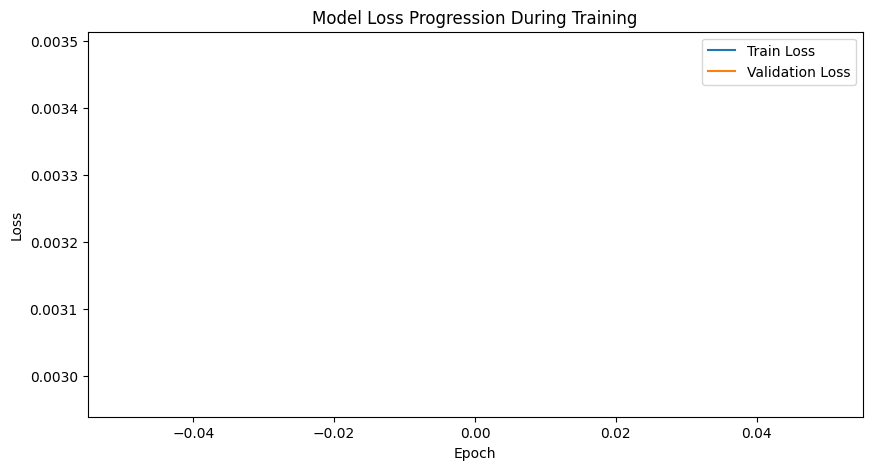

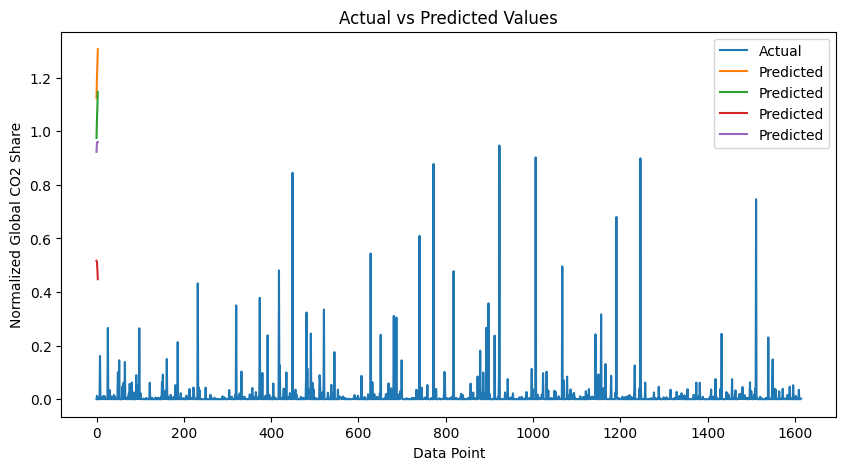

In [23]:
import matplotlib.pyplot as plt

# Plotting the training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Comparing actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.ylabel('Normalized Global CO2 Share')
plt.xlabel('Data Point')
plt.legend()
plt.show()